#### 🇹🇳 A Decade of Economic Evolution in Tunisia (2010–2023)

This project explores Tunisia’s key economic indicators over the past decade through a data-driven lens.  
By analyzing trends in GDP, inflation, population, government debt, and unemployment, we uncover how major events such as the 2011 revolution, the COVID-19 pandemic, and recent inflationary pressures have shaped the country’s economic trajectory.

##### Objectives:
- Understand long-term trends and anomalies in Tunisia’s economy  
- Visualize economic shifts across 2010–2023  
- Extract insights using real data from the World Bank  
- Apply statistical analysis and basic machine learning for forecasting  

<br>

Tools used: pandas, matplotlib, numpy, scikit-learn  
Data source: [World Bank Open Data](https://data.worldbank.org/country/tunisia)


#### 1. Load and Clean the Data


In [16]:
import pandas as pd

df = pd.read_csv("data/API_TUN_DS2_en_csv_v2_13520.csv", skiprows=4)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Tunisia,TUN,"Internally displaced persons, new displacement...",VC.IDP.NWDS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.900000e+02,3.300000e+03,3.200000e+01,1.000000e+04,1.200000e+03,2.000000e+03,2.600000e+03,NaN,NaN
1,Tunisia,TUN,"Voice and Accountability: Percentile Rank, Upp...",VA.PER.RNK.UPPER,NaN,NaN,NaN,NaN,NaN,NaN,...,6.354680e+01,5.763547e+01,5.970874e+01,6.038647e+01,5.990338e+01,5.700483e+01,4.444444e+01,4.607843e+01,NaN,NaN
2,Tunisia,TUN,Voice and Accountability: Estimate,VA.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,3.036524e-01,1.619458e-01,1.914097e-01,2.663486e-01,2.837476e-01,1.099035e-01,-2.481002e-01,-2.128970e-01,NaN,NaN
3,Tunisia,TUN,High-technology exports (current US$),TX.VAL.TECH.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.710672e+08,8.508289e+08,8.289296e+08,8.405061e+08,8.326070e+08,9.596790e+08,1.041437e+09,1.198528e+09,NaN,NaN
4,Tunisia,TUN,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.WR.ZS,12.15859,5.152471,3.656307,6.762849,9.723461,7.962963,...,1.062254e+01,8.640433e+00,8.850040e+00,9.321362e+00,8.117976e+00,8.091238e+00,8.672833e+00,8.657722e+00,NaN,NaN


In [17]:
indicators = [
    "NY.GDP.MKTP.CD",
    "FP.CPI.TOTL.ZG",
    "SL.UEM.TOTL.ZS",
    "SP.POP.TOTL",
    "GC.DOD.TOTL.GD.ZS"
]
df_filtered = df[df["Indicator Code"].isin(indicators)]
df_filtered = df_filtered[df_filtered["Indicator Name"] != "Indicator Code"]

In [18]:
df_years = df_filtered.loc[:, ["Indicator Name"] + [str(y) for y in range(2010, 2024)]]

df_years = df_years.melt(
    id_vars=["Indicator Name"],
    var_name="Year",
    value_name="Value"
)
df_years.head()

,Indicator Name,Year,Value
0,"Population, total",2010,1.076598e+07
1,GDP (current US$),2010,4.620609e+10
2,"Central government debt, total (% of GDP)",2010,3.876600e+01
3,"Inflation, consumer prices (annual %)",2010,3.338980e+00
4,"Unemployment, total (% of total labor force) (...",2010,1.304900e+01


#### 2. Visual Exploration of Indicators (2010–2023)

We plot time-series graphs for each key indicator and observe their trends.


In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

os.makedirs("output/plots", exist_ok=True)


for ind in df_years["Indicator Name"].unique():
    sub_df = df_years[df_years["Indicator Name"] == ind]
    
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(sub_df["Year"], sub_df["Value"])
    
    ax = plt.gca()  
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
   
    plt.title(ind, fontsize=14)
    plt.ylabel("Value", fontsize=12)
    plt.xlabel("Year", fontsize=12)
    

    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
  
    filename = ind.replace('/', '_').replace('\\', '_').replace(':', '_')  
    plt.savefig(f"output/plots/{filename}.png", dpi=300, bbox_inches='tight')
    

    plt.close()

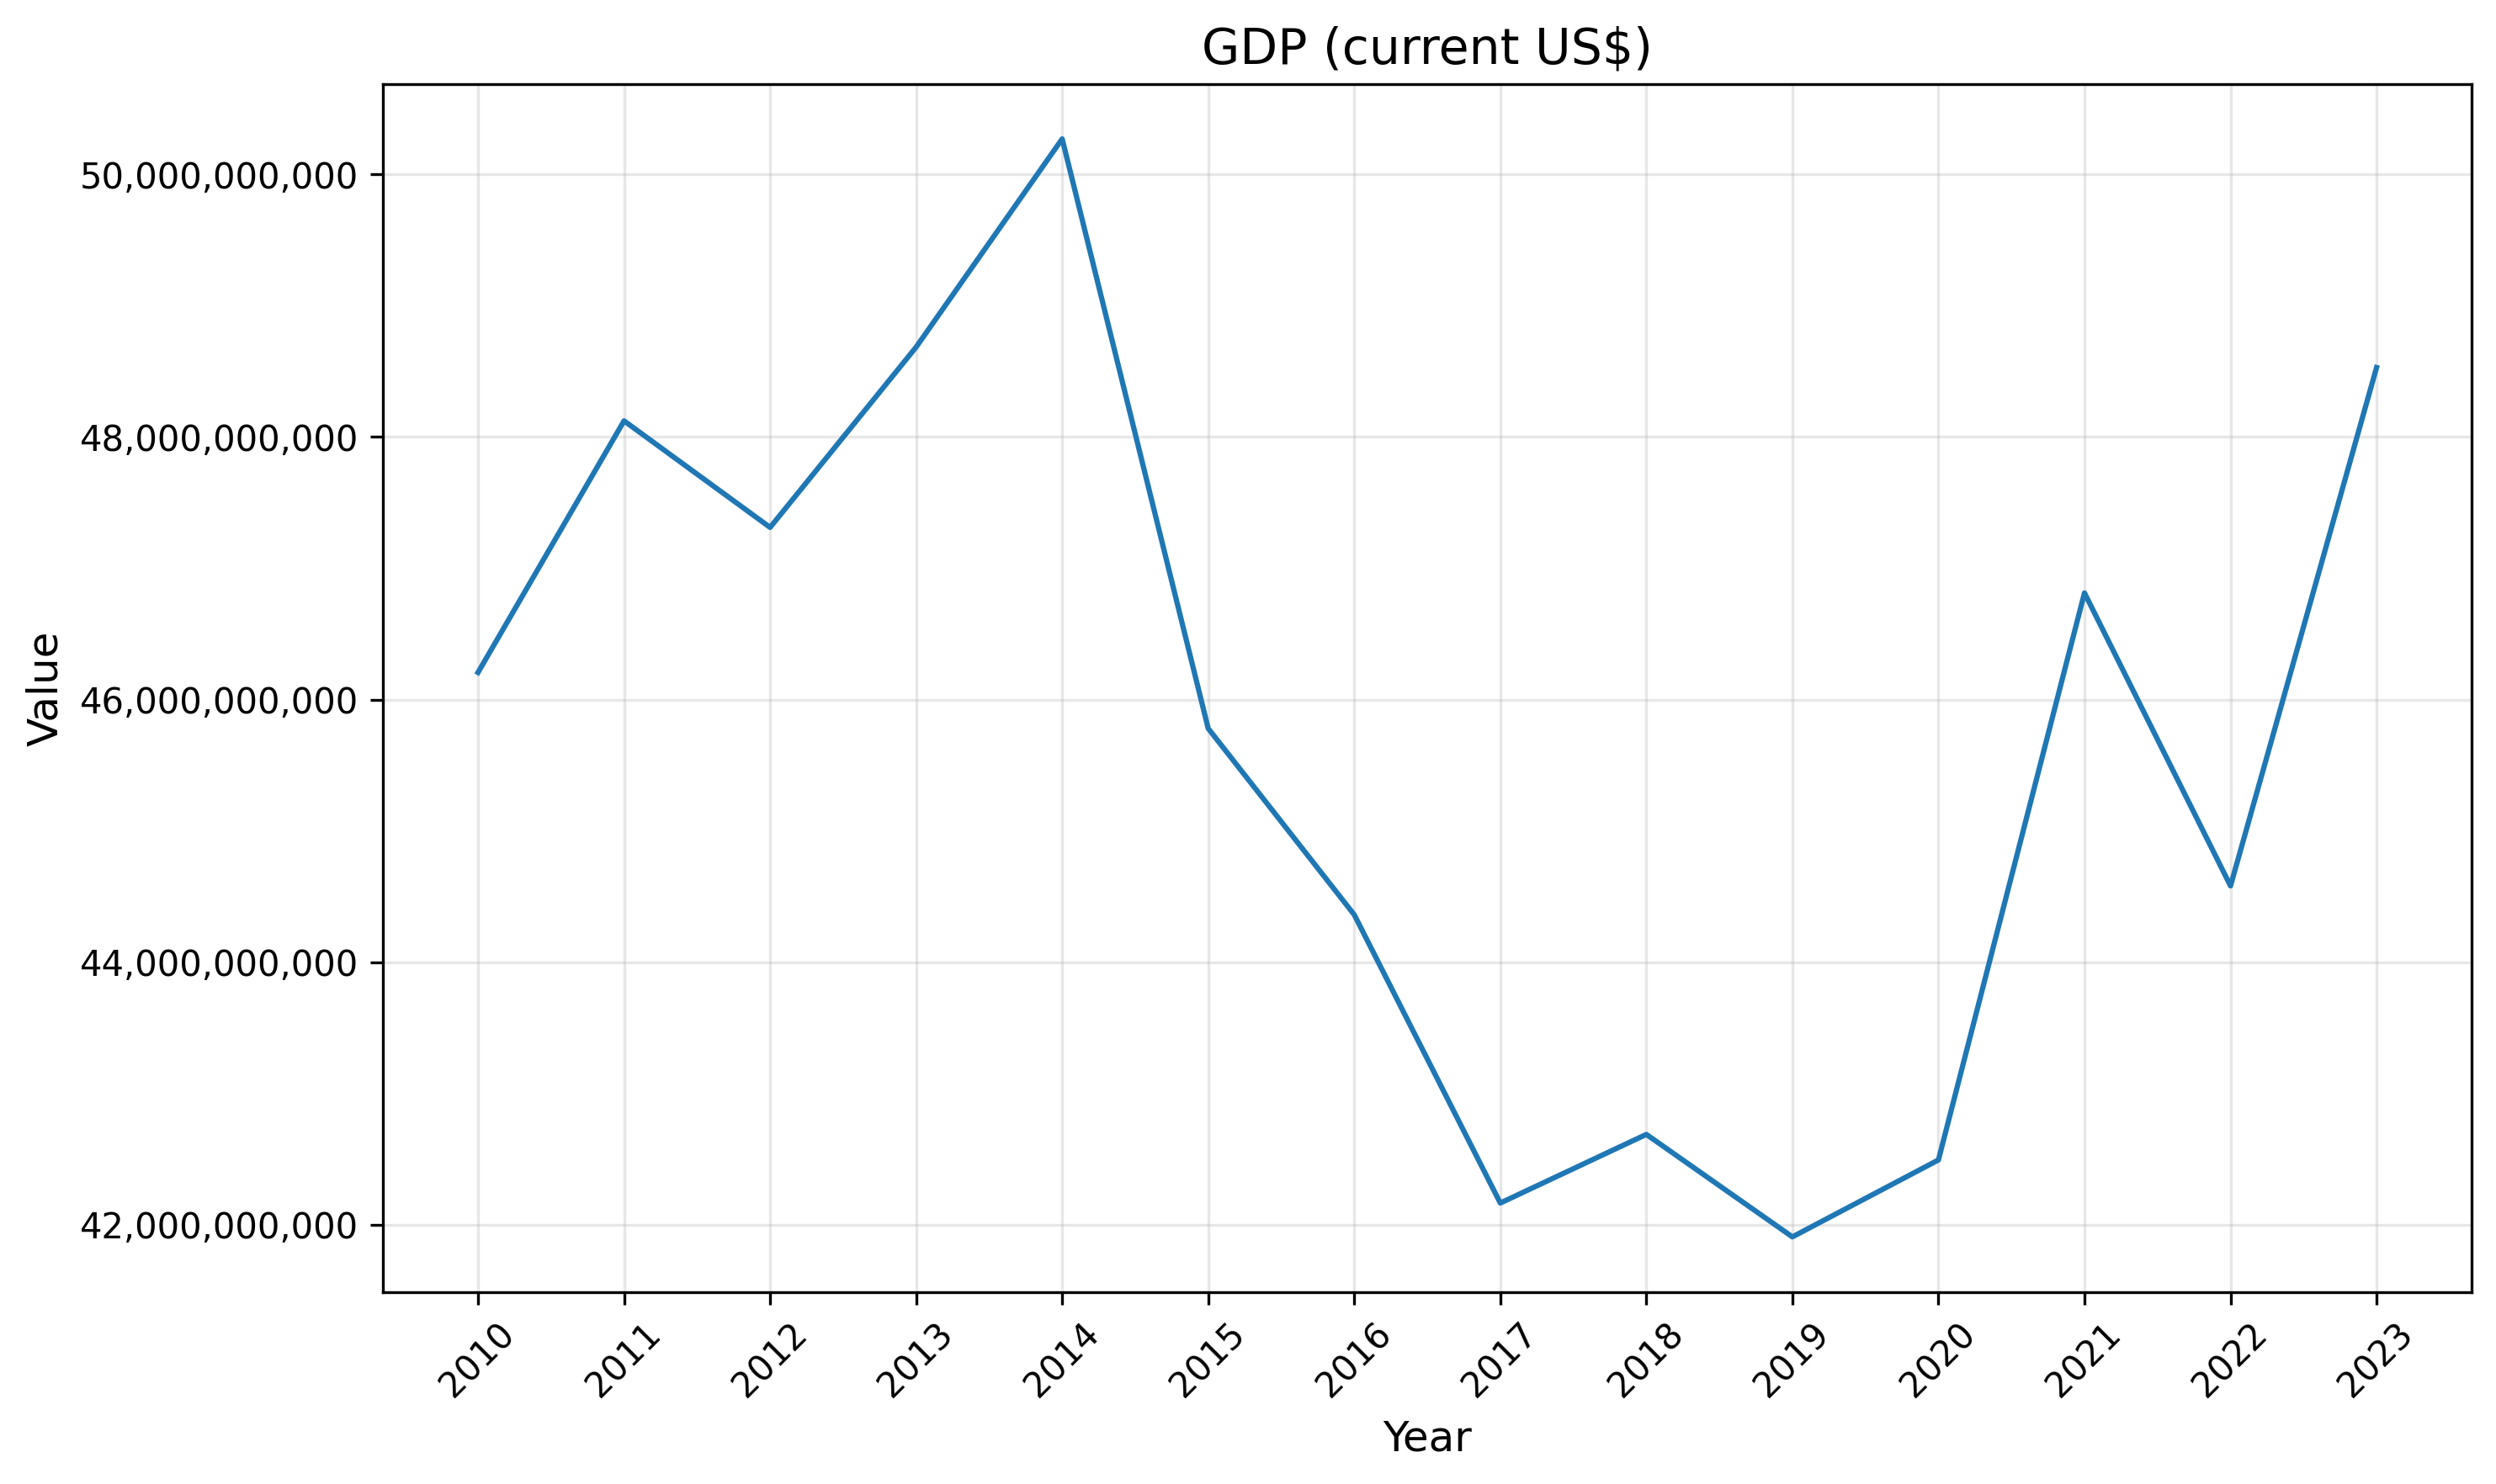

In [20]:
from IPython.display import Image, display

display(Image(filename="output/plots/GDP (current US$).png"))

##### Insight: Tunisia's GDP (2010–2023)

Between 2010 and 2014, Tunisia’s GDP showed steady growth, peaking in 2014. After that, there was a noticeable decline, especially between 2015–2017, possibly due to economic or political instability. In 2020, GDP slightly recovered post-COVID dip. A strong rebound is visible in 2023.


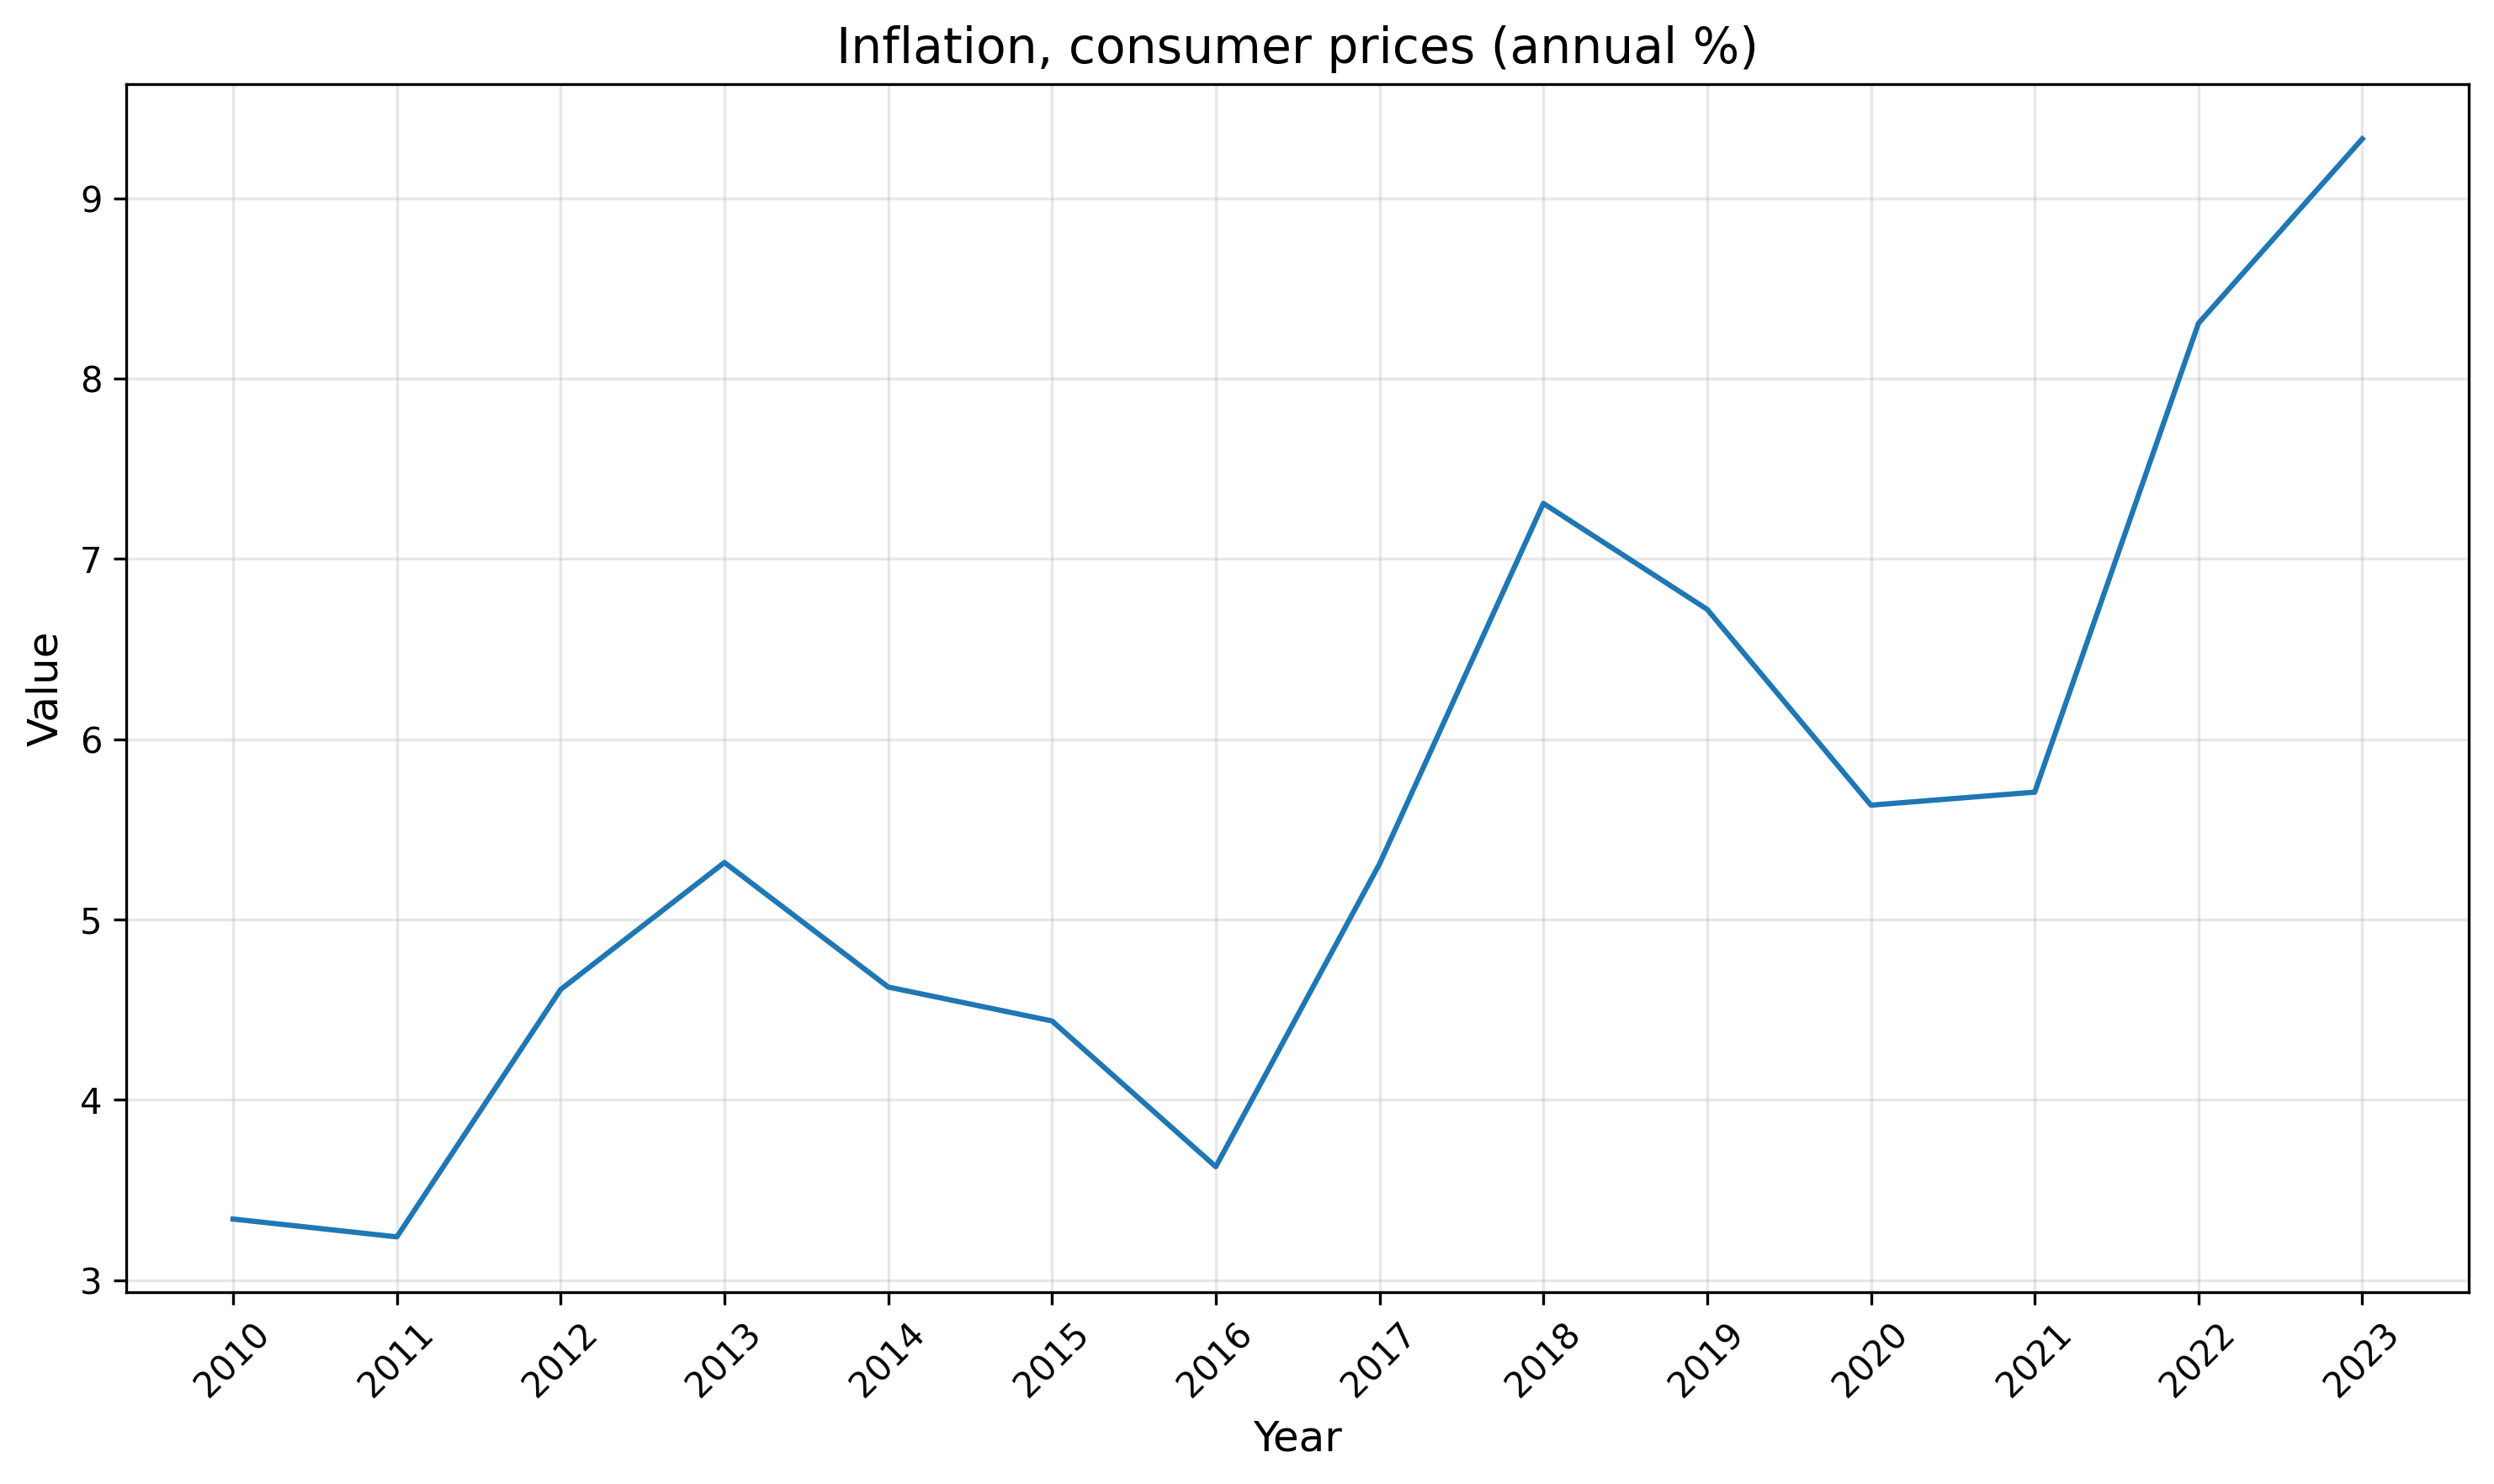

In [21]:
display(Image(filename="output/plots/Inflation, consumer prices (annual %).png"))

##### Insight: Tunisia's Inflation (2010–2023)
**Average inflation** over the period: **~5.7%**  
**Highest inflation**: **9.3% in 2023**  
**Lowest inflation**: **3.2% in 2011**  
  
Inflation remained moderate until 2017, then **rose sharply**, peaking in recent years.  
Possible causes include **economic instability**, **currency devaluation**, and **global price shocks**.


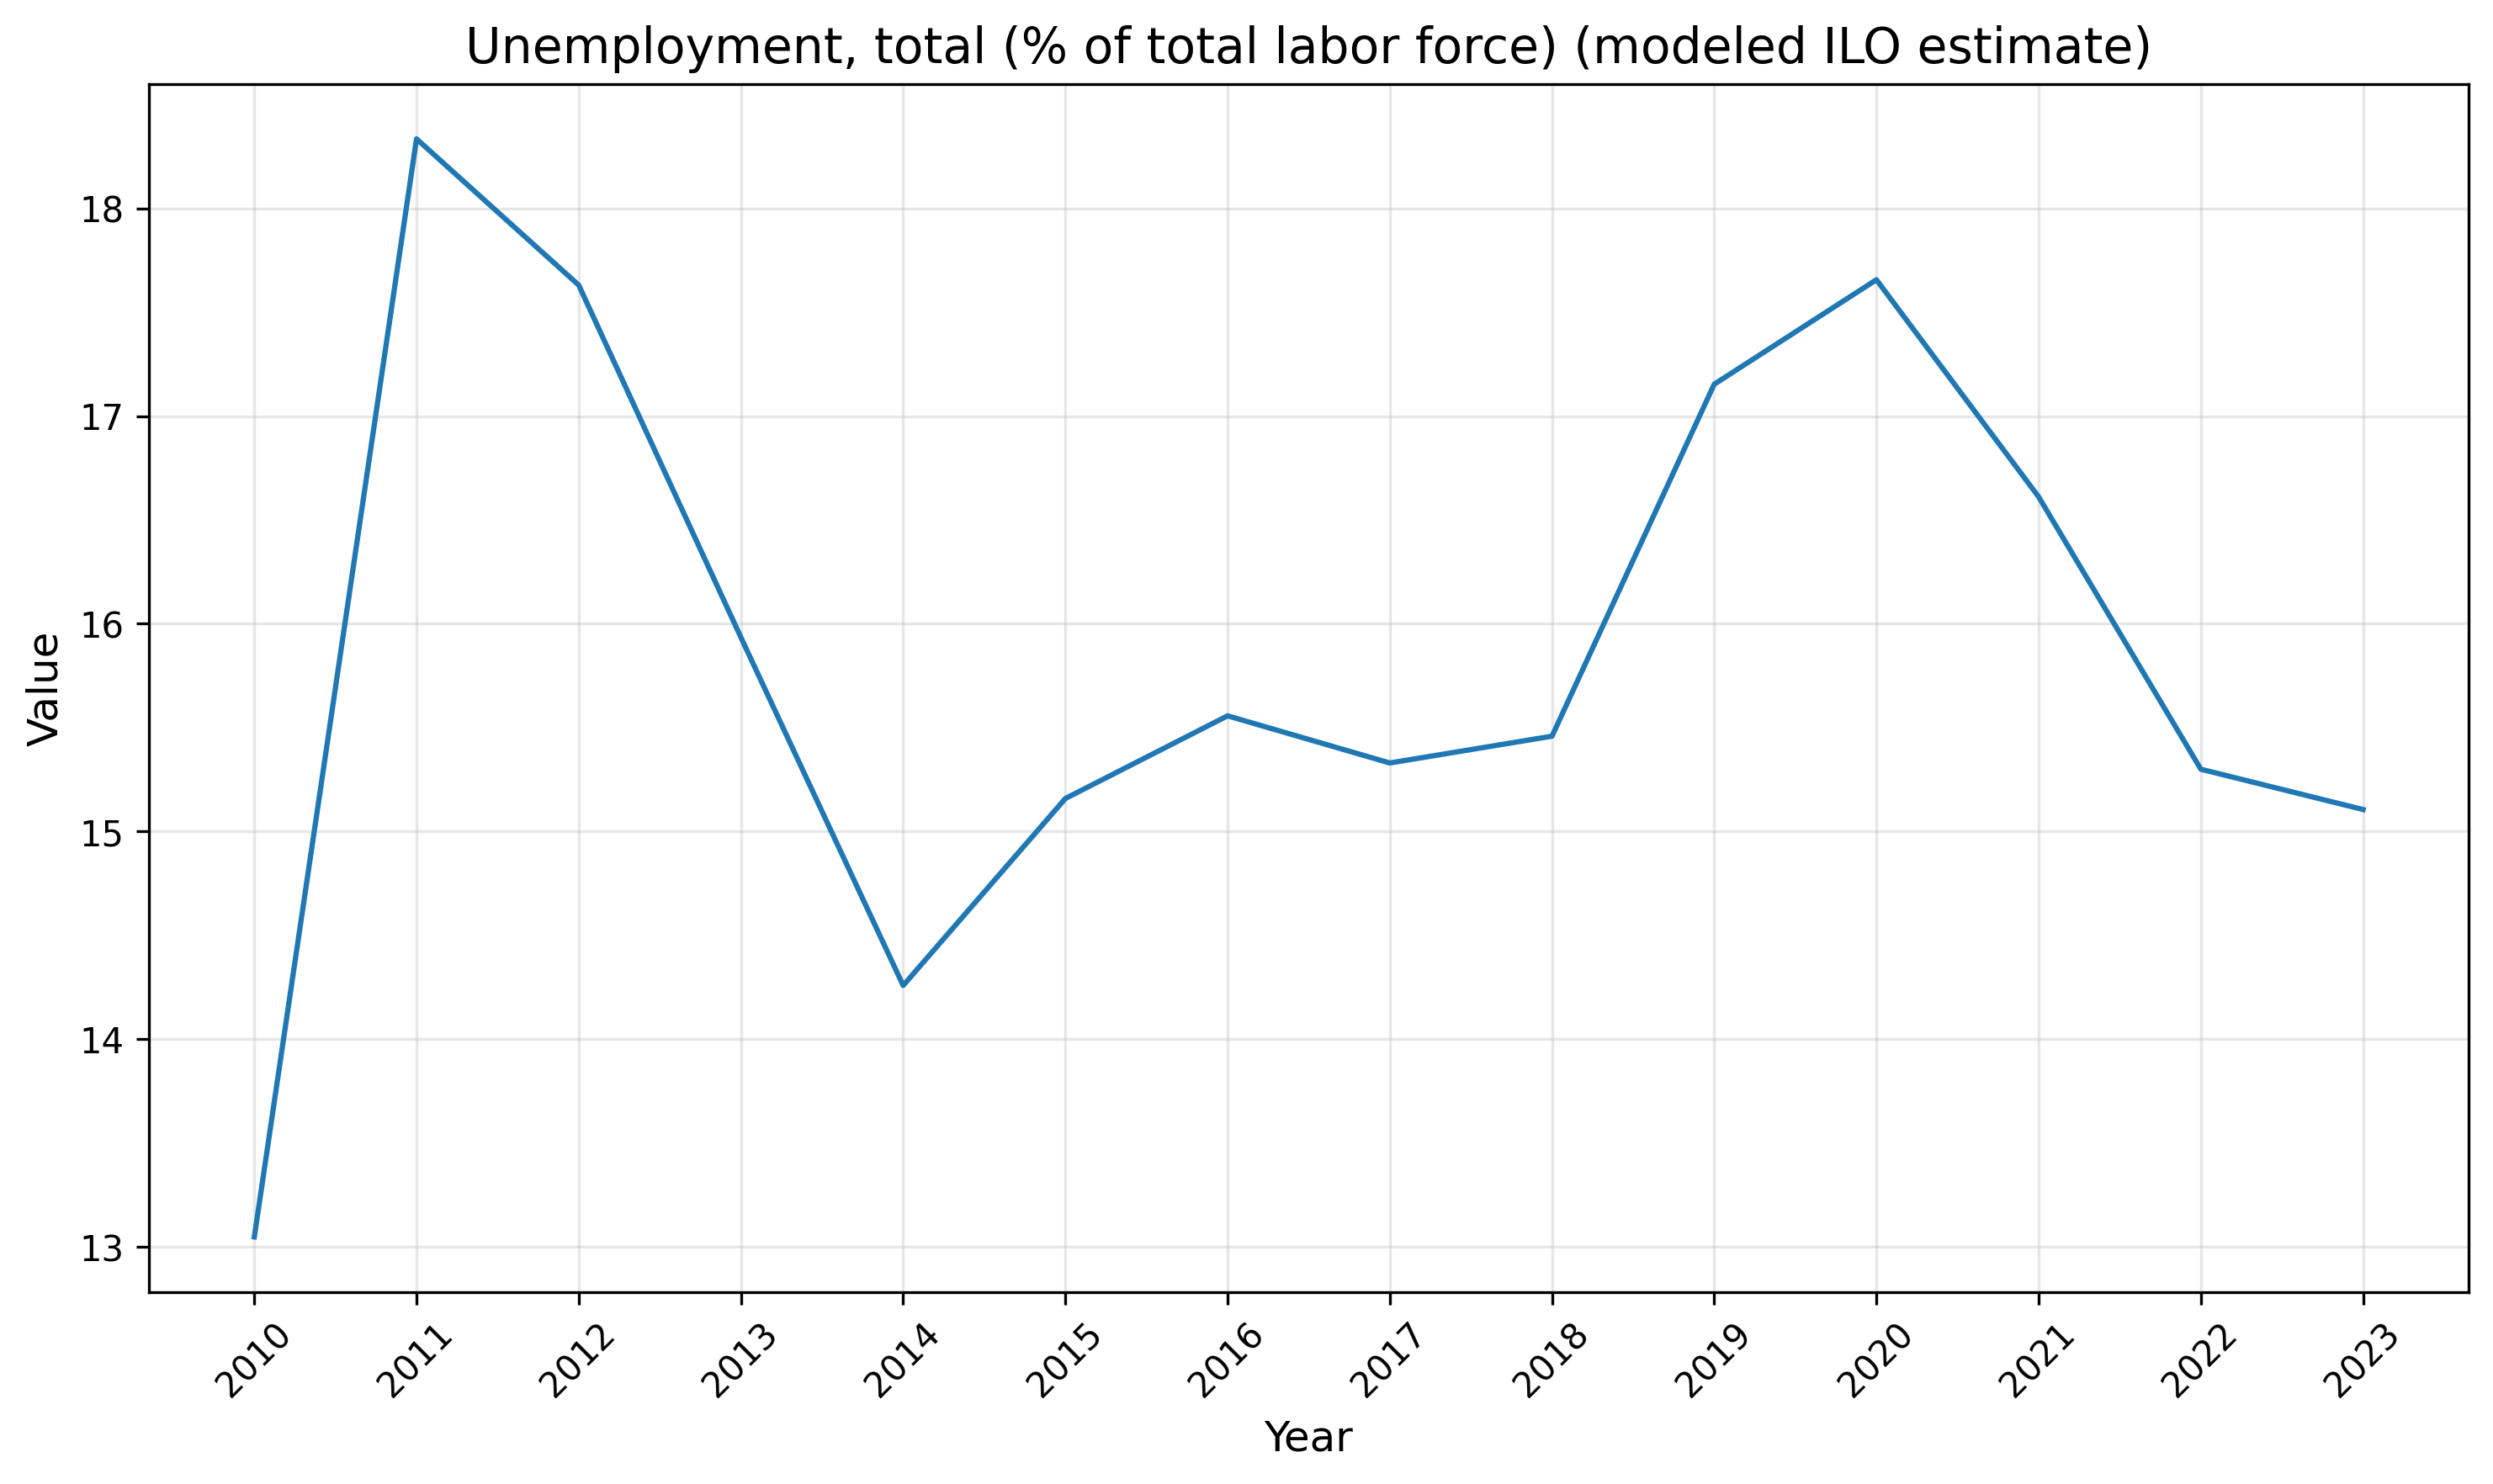

In [22]:
display(Image(filename=r"output/plots/Unemployment, total (% of total labor force) (modeled ILO estimate).png"))

##### Insight: Tunisia's Unemployment (2010–2023)

**Avg. rate**: ~15.6%  **Peak**: 18.3% (2011)  **Low**: 13.0% (2010)

Unemployment spiked after the 2011 revolution and again in 2020 (COVID-19).  
Rates have gradually declined since but remain above pre-2011 levels.  
Key factors: political instability, weak growth, and external shocks.


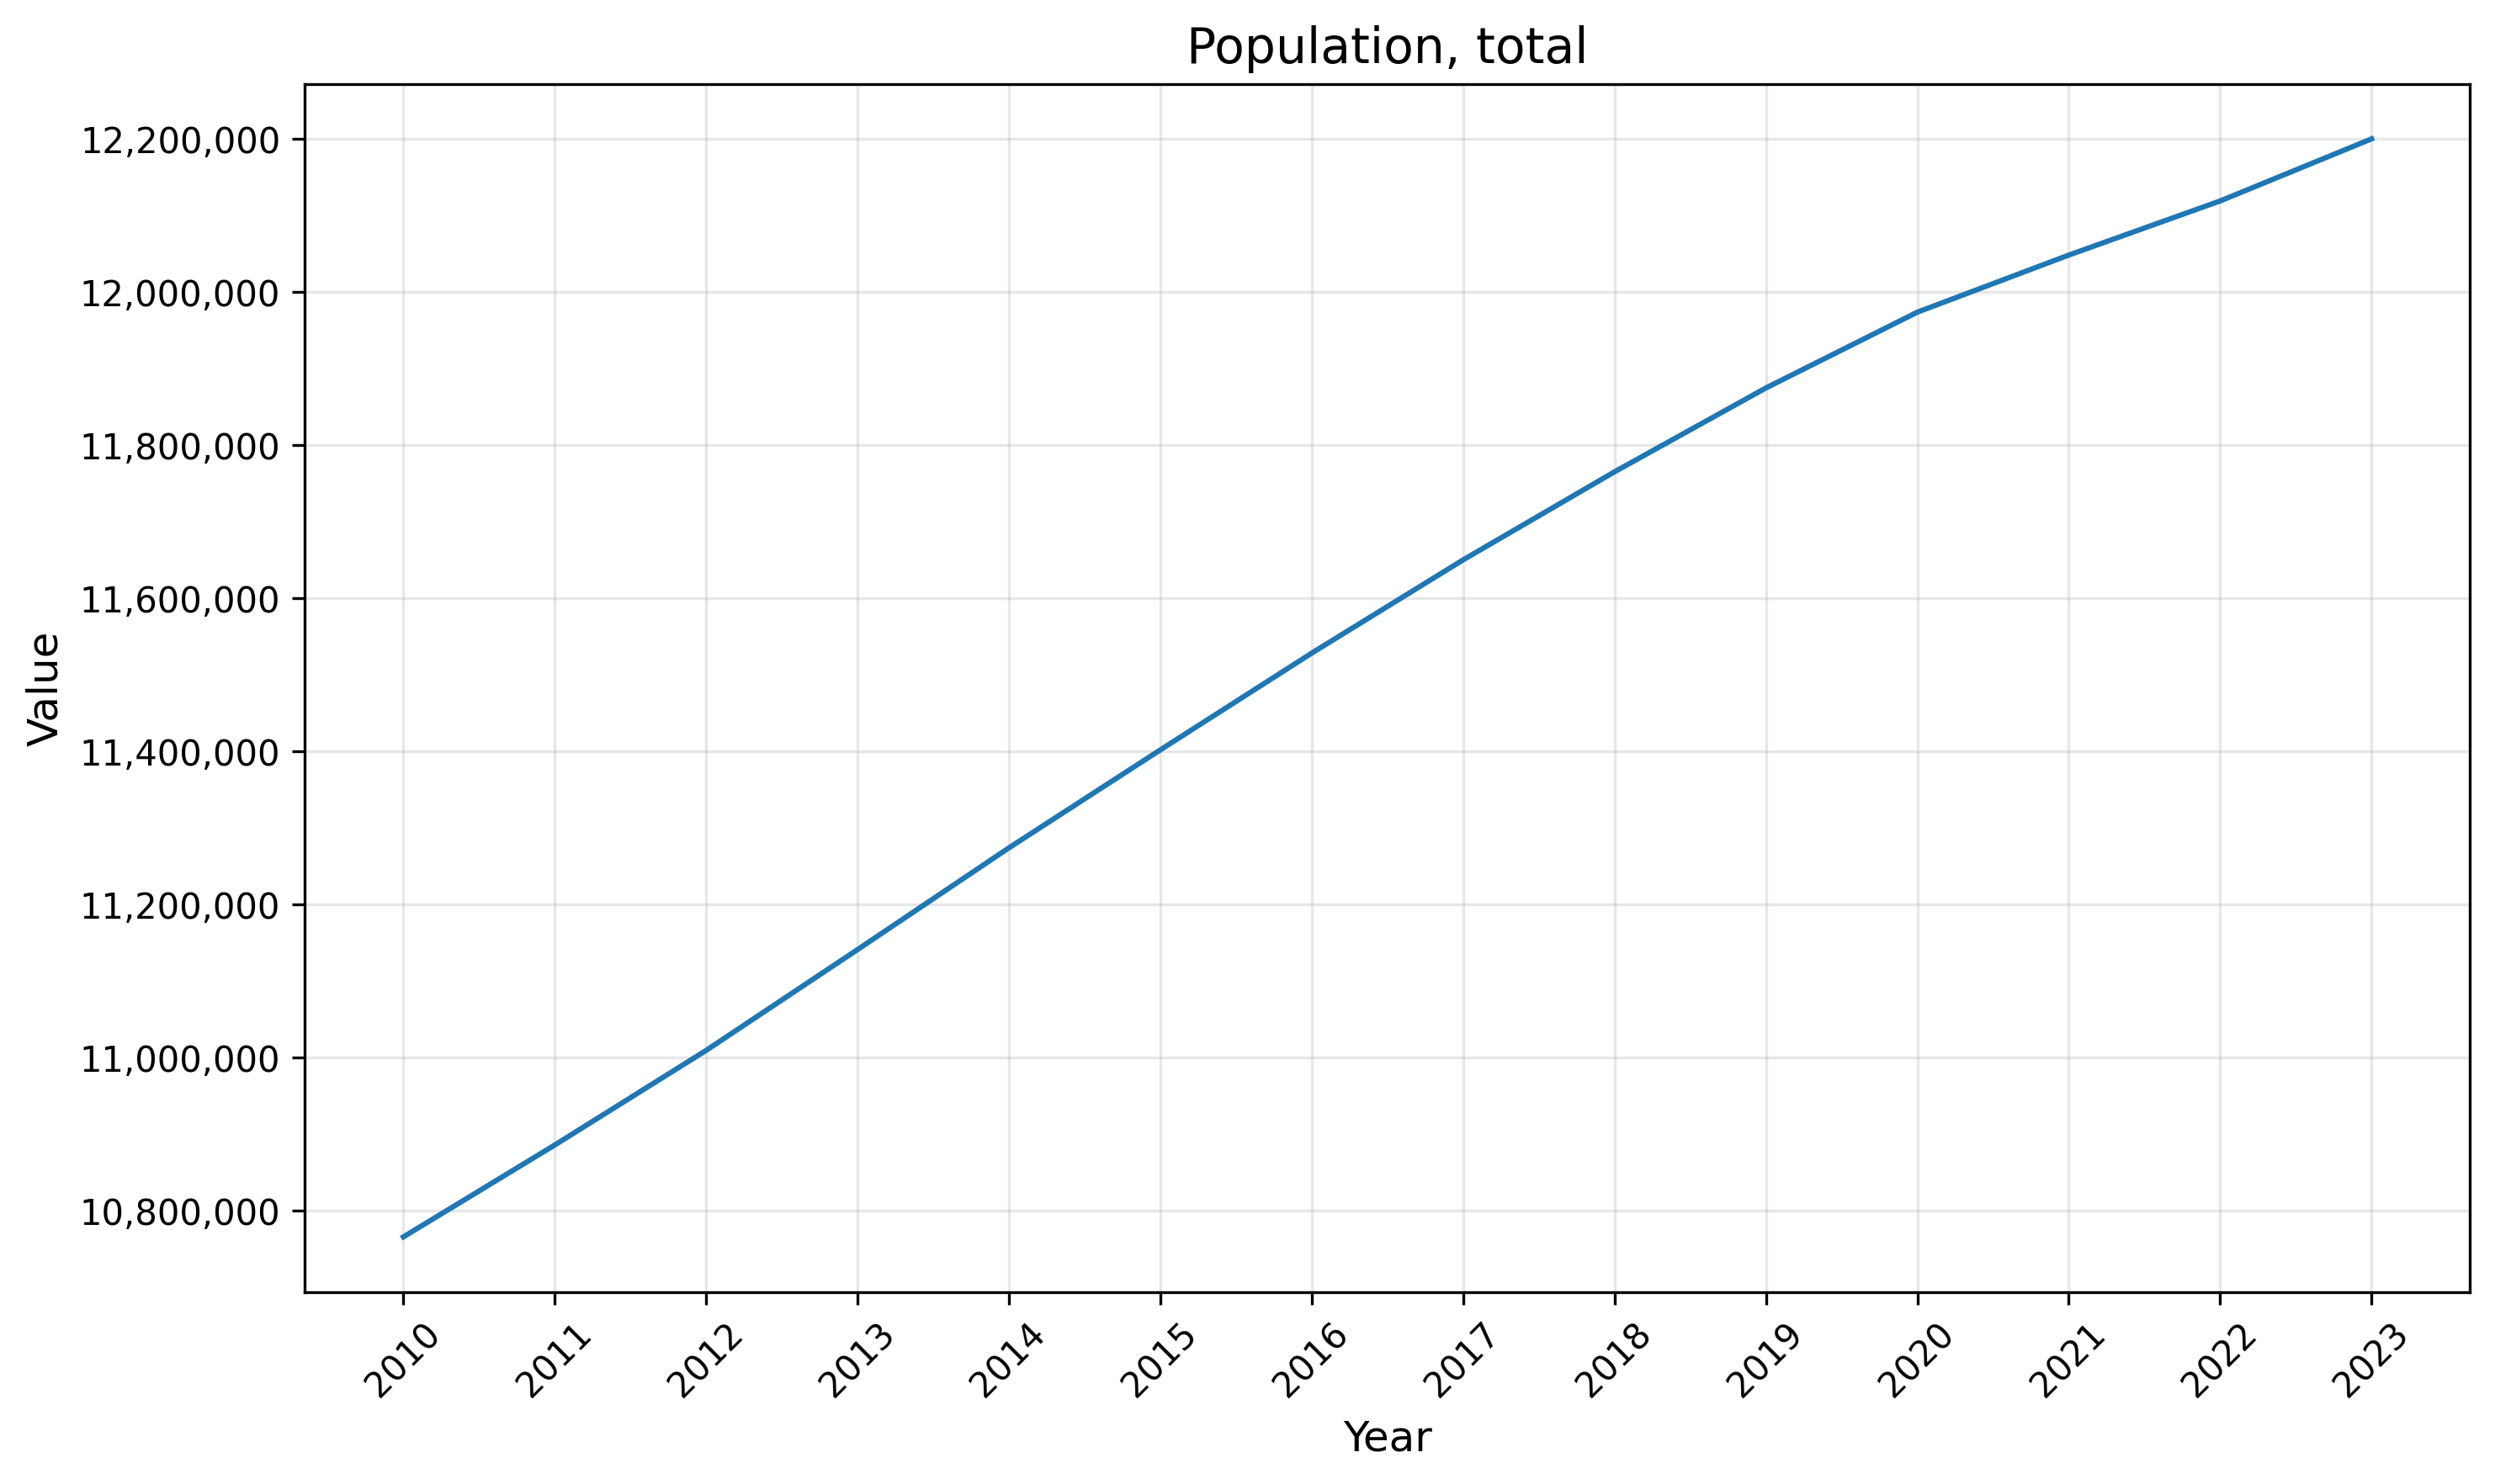

In [23]:
display(Image(filename=r"output\plots\Population, total.png"))

##### Insight: Tunisia's Population Growth (2010–2023)
**2010**: ~10.75 million  **2023**: ~12.2 million  

Steady population growth over 13 years, adding ~1.45 million people.  
Growth appears **gradual** and **consistent**, with no major disruptions.


#### 3. Statistical Analysis & Insights

In [24]:
import numpy as np

##### Average Annual Growth Rate of Population

$$
\text{CAGR} = \left( \frac{V_{\text{final}}}{V_{\text{initial}}} \right)^{\frac{1}{n}} - 1
$$
- $V_{\text{final}}$: Population in 2023  
- $V_{\text{initial}}$: Population in 2010  
- $n$: Number of years  

In [38]:
pop_df = df_years[df_years["Indicator Name"] == "Population, total"].copy()
pop_df["Value"] = pd.to_numeric(pop_df["Value"], errors="coerce")
pop_df = pop_df.dropna()


start_value = pop_df.iloc[0]["Value"]
end_value = pop_df.iloc[-1]["Value"]
n_years = int(pop_df.iloc[-1]["Year"]) - int(pop_df.iloc[0]["Year"])


cagr = ((end_value / start_value) ** (1 / n_years)) - 1
print(f" Average annual growth rate in population (CAGR): {cagr*100:.2f}%")


 Average annual growth rate in population (CAGR): 0.97%


##### Correlation between Inflation and Unemployment

$$
r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$

- $r \in [-1, 1]$
- A value near **1** indicates strong positive correlation
- A value near **-1** indicates strong negative correlation
- A value near **0** indicates no correlation

This helps explore whether inflation changes relate to employment trends.


In [39]:
inflation_df = df_years[df_years["Indicator Name"] == "Inflation, consumer prices (annual %)"].copy()
unemployment_df = df_years[df_years["Indicator Name"].str.startswith("Unemployment")].copy()

inflation_df["Value"] = pd.to_numeric(inflation_df["Value"], errors="coerce")
unemployment_df["Value"] = pd.to_numeric(unemployment_df["Value"], errors="coerce")


merged = pd.merge(
    inflation_df[["Year", "Value"]].rename(columns={"Value": "Inflation"}),
    unemployment_df[["Year", "Value"]].rename(columns={"Value": "Unemployment"}),
    on="Year"
).dropna()


correlation = np.corrcoef(merged["Inflation"], merged["Unemployment"])[0, 1]
print(f" Correlation between Inflation and Unemployment: {correlation:.2f}")


 Correlation between Inflation and Unemployment: -0.04


##### Population Growth Rate (Annual %)


$$
\text{Growth Rate}_{t} = \frac{V_{t} - V_{t-1}}{V_{t-1}} \times 100
$$

Where:
- \( V_t \): population in year *t*


In [40]:
pop = df_years[df_years["Indicator Name"] == "Population, total"].copy()
pop["Year"] = pop["Year"].astype(int)
pop.sort_values("Year", inplace=True)
pop["Growth Rate (%)"] = pop["Value"].pct_change() * 100


pop[["Year", "Value", "Growth Rate (%)"]].tail()


,Year,Value,Growth Rate (%)
45,2019,11875081.0,0.931256
50,2020,11974057.0,0.833476
55,2021,12048622.0,0.622721
60,2022,12119334.0,0.586889
65,2023,12200431.0,0.669154


##### GDP Trend (Using Linear Regression)

$$
\text{GDP} = m \cdot \text{Year} + b
$$

- \( m \): slope (growth per year)
- \( b \): intercept


In [41]:
from sklearn.linear_model import LinearRegression

gdp = df_years[df_years["Indicator Name"] == "GDP (current US$)"].copy()
gdp = gdp.dropna()
gdp["Year"] = gdp["Year"].astype(int)

model = LinearRegression()
model.fit(gdp[["Year"]], gdp["Value"])

slope = model.coef_[0]
print(f"GDP Trend Slope: {slope:,.0f} USD/year")


GDP Trend Slope: -241,599,328 USD/year


#### Project Summary: Tunisia Economic Dashboard (2010–2023)

This project analyzes five key economic indicators in Tunisia from 2010 to 2023 using data from the World Bank.  
The indicators include: GDP, inflation, unemployment, population, and government debt. The goal is to uncover trends, patterns, and possible causes behind economic changes over the last decade.

##### Key Findings

- GDP increased from 2010 to 2014, then declined until 2017. After a dip in 2020 due to COVID-19, it rebounded strongly by 2023.

- Inflation averaged 5.7%. It remained stable until 2017, then rose sharply reaching a peak of 9.3% in 2023.

- Unemployment averaged 15.6%, peaking in 2011 and again in 2020. It has slightly improved in recent years but remains above pre-2011 levels.

- Population grew steadily from ~10.75 million in 2010 to ~12.2 million in 2023, with an average annual growth rate of 0.97%.

- The correlation between inflation and unemployment is –0.04, indicating no strong linear relationship.

This dashboard helps visualize how Tunisia's economy responded to events such as the 2011 revolution, the COVID-19 pandemic, and inflationary pressure in recent years.    




<br><br><br>

Project by: Yosr Bejaoui  
Date: June 2025  
LinkedIn: https://www.linkedin.com/in/yosr-bejaoui-960b84255/